# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [108]:
import tensorflow as tf
from scipy.io import loadmat

In [109]:
! rm -r model_checkpoints_best
! rm -r model_checkpoints

rm: cannot remove 'model_checkpoints': No such file or directory


For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [110]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [111]:
# Load the dataset from your Drive folder

# Needed to customize the path
path_train = 'gdrive/My Drive/Colab Notebooks/Coursera_TF_for_DL/supporting_files/train_32x32.mat'
path_test = 'gdrive/My Drive/Colab Notebooks/Coursera_TF_for_DL/supporting_files/test_32x32.mat'

train = loadmat(path_train)
test = loadmat(path_test)

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [112]:
# Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
import numpy as np

X_train = train['X']
y_train = train['y']

X_test = test['X']
y_test = test['y']

In [113]:
# Check shapes
X_test.shape, X_train.shape

((32, 32, 3, 26032), (32, 32, 3, 73257))

In [114]:
# Adjust dims 
X_train = np.moveaxis(X_train, 3, 0)
X_test = np.moveaxis(X_test, 3, 0)

X_train.shape[0], X_test.shape

(73257, (26032, 32, 32, 3))

In [115]:
# Note: I know this change to one-hot isn't necessarily needed, but I could not get my model to return anything but nan results otherwise... Not sure why :(
from sklearn.preprocessing import OneHotEncoder

y_train_one_hot = OneHotEncoder().fit_transform(y_train).toarray()
y_test_one_hot = OneHotEncoder().fit_transform(y_test).toarray()


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


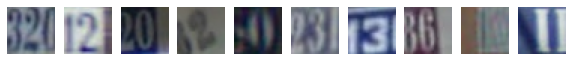

In [116]:
# Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
import matplotlib.pyplot as plt
import random as random

fix, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
  ax[i].set_axis_off()
  j = random.randint(0, X_train.shape[0])
  print(y_train_one_hot[j])
  ax[i].imshow(X_train[j,:,:,:])

In [117]:
# Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. Hint: retain the channel dimension, which will now have size 1.
X_train_gray = np.mean(X_train, axis=3)
X_train_gray_channel = np.mean(X_train,axis=3, keepdims=True) / 255

X_test_gray = np.mean(X_test, axis=3)
X_test_gray_channel = np.mean(X_test,axis=3, keepdims=True) / 255

X_train_gray_channel.shape, X_test_gray_channel.shape

((73257, 32, 32, 1), (26032, 32, 32, 1))

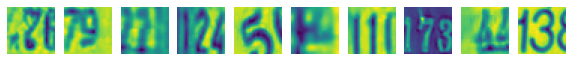

In [118]:
# Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.
fix, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
  ax[i].set_axis_off()
  j = random.randint(0, X_train_gray.shape[0])
  ax[i].imshow(X_train_gray[j,:,:])

In [119]:
np.min(X_train_gray_channel), np.max(X_train_gray_channel)

(0.0, 1.0)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [120]:
X_train.shape

(73257, 32, 32, 3)

In [121]:
X_train_gray_channel.shape, X_train_gray.shape

((73257, 32, 32, 1), (73257, 32, 32))

In [122]:
# Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=X_train_gray_channel[0].shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 146,026
Trainable params: 146,026
Non-tr

In [123]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
# Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
from tensorflow.keras.callbacks import ModelCheckpoint

# Create Tensorflow checkpoint object
checkpoint_path = 'model_checkpoints_full/checkpoint'
checkpoint_epoch = ModelCheckpoint(filepath=checkpoint_path,
                             frequency='epoch',
                             verbose=1)

# metric = 'val_acc'
checkpoint_best_path = 'model_checkpoints_best/checkpoint'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                  save_freq='epoch',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  save_weights_only=True,
                                  verbose=1)

In [125]:
# Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.

history = model.fit(x=X_train_gray_channel,
                    y=y_train_one_hot,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    callbacks=[checkpoint_epoch, checkpoint_best],
                    validation_data=(X_test_gray_channel, y_test_one_hot),
                    validation_split=0.15)

for key in history.history:
  print(key)

Epoch 1/10
1139/1145 [============================>.] - ETA: 0s - loss: 2.0768 - accuracy: 0.2455
Epoch 1: saving model to model_checkpoints_full/checkpoint

Epoch 1: val_accuracy improved from -inf to 0.40001, saving model to model_checkpoints_best/checkpoint
1145/1145 [==============================] - 7s 6ms/step - loss: 2.0751 - accuracy: 0.2462 - val_loss: 1.6947 - val_accuracy: 0.4000
Epoch 2/10
1140/1145 [============================>.] - ETA: 0s - loss: 1.5089 - accuracy: 0.4828
Epoch 2: saving model to model_checkpoints_full/checkpoint

Epoch 2: val_accuracy improved from 0.40001 to 0.50976, saving model to model_checkpoints_best/checkpoint
1145/1145 [==============================] - 6s 5ms/step - loss: 1.5088 - accuracy: 0.4831 - val_loss: 1.4911 - val_accuracy: 0.5098
Epoch 3/10
1144/1145 [============================>.] - ETA: 0s - loss: 1.3195 - accuracy: 0.5601
Epoch 3: saving model to model_checkpoints_full/checkpoint

Epoch 3: val_accuracy improved from 0.50976 to 0.56

In [126]:
preds = model.predict(x=X_train_gray_channel)


2290/2290 [==============================] - 4s 2ms/step


In [127]:
print(np.argmax(preds[0])), print(y_train[0])

0
[1]


(None, None)

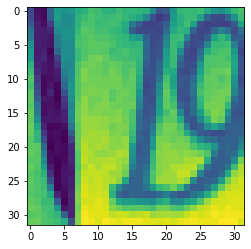

In [128]:
plt.imshow(X_train_gray[0])

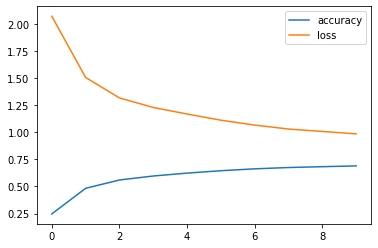

In [130]:
# As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
# Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'loss'])


In [131]:
# Compute and display the loss and accuracy of the trained model on the test set.
model.evaluate(X_test_gray_channel, y_test_one_hot)

814/814 [==============================] - 2s 3ms/step - loss: 1.0725 - accuracy: 0.6703


[1.0725152492523193, 0.6703288555145264]

In [134]:
preds = model.predict(X_test_gray_channel)
preds[0]

814/814 [==============================] - 2s 2ms/step


array([0.03002706, 0.0349046 , 0.04129532, 0.3003812 , 0.18257795,
       0.08957404, 0.0225744 , 0.1097439 , 0.13423266, 0.05468886],
      dtype=float32)

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [135]:
# Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output.
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout

model_CNN = Sequential([
      Conv2D(filters=32, kernel_size=4, activation='relu', input_shape=X_train_gray_channel[0].shape),
      MaxPool2D(pool_size=(3,3), strides=1),
      Conv2D(filters=16, kernel_size=2, padding='same', strides=1, activation='relu'),
      MaxPool2D(pool_size=(2,2), strides=2),
      BatchNormalization(),
      Conv2D(filters=32, kernel_size=3, padding='valid', strides=2, activation='relu'),
      Dropout(0.3),
      Dense(64, activation='relu'),
      Flatten(),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
])

In [136]:
# The CNN model should use fewer trainable parameters than your MLP model. <Confirmed>
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 16)        2064      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 16)       64        
 hNormalization)                                                 
                                                      

In [137]:
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [138]:
# Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
from tensorflow.keras.callbacks import ModelCheckpoint

# Create Tensorflow checkpoint object
checkpoint_path_CNN = 'model_checkpoints_full/checkpoint_CNN'
checkpoint_epoch_CNN = ModelCheckpoint(filepath=checkpoint_path_CNN,
                              frequency='epoch',
                              verbose=1)

checkpoint_best_path_CNN = 'model_checkpoints_best/checkpoint_CNN'
checkpoint_best_CNN = ModelCheckpoint(filepath=checkpoint_best_path_CNN,
                                    save_freq='epoch',
                                    monitor='val_accuracy',
                                    save_best_only=True,
                                    save_weights_only=True,
                                    verbose=1)

In [139]:
# Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
# Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback. <acc, and same 2 callbacks as above (no requirement for new ones)>

history_CNN = model_CNN.fit(x=X_train_gray_channel,
                    y=y_train_one_hot,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    callbacks=[checkpoint_epoch_CNN, checkpoint_best_CNN],
                    validation_data=(X_test_gray_channel, y_test_one_hot),
                    validation_split=0.15)

Epoch 1/10
1139/1145 [============================>.] - ETA: 0s - loss: 0.8268 - accuracy: 0.7395
Epoch 1: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 1: val_accuracy improved from -inf to 0.71243, saving model to model_checkpoints_best/checkpoint_CNN
1145/1145 [==============================] - 13s 10ms/step - loss: 0.8255 - accuracy: 0.7400 - val_loss: 0.9280 - val_accuracy: 0.7124
Epoch 2/10
1142/1145 [============================>.] - ETA: 0s - loss: 0.5277 - accuracy: 0.8427
Epoch 2: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 2: val_accuracy improved from 0.71243 to 0.84515, saving model to model_checkpoints_best/checkpoint_CNN
1145/1145 [==============================] - 15s 13ms/step - loss: 0.5275 - accuracy: 0.8427 - val_loss: 0.5242 - val_accuracy: 0.8452
Epoch 3/10
1138/1145 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.8595
Epoch 3: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 3: val_accuracy improved from 0.84515 to 0.85453, saving model to model_checkpoints_best/checkpoint_CNN
1145/1145 [==============================] - 12s 10ms/step - loss: 0.4737 - accuracy: 0.8595 - val_loss: 0.4872 - val_accuracy: 0.8545
Epoch 4/10
1138/1145 [============================>.] - ETA: 0s - loss: 0.4439 - accuracy: 0.8668
Epoch 4: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 4: val_accuracy did not improve from 0.85453
1145/1145 [==============================] - 14s 12ms/step - loss: 0.4438 - accuracy: 0.8669 - val_loss: 0.5150 - val_accuracy: 0.8488
Epoch 5/10
1141/1145 [============================>.] - ETA: 0s - loss: 0.4162 - accuracy: 0.8749
Epoch 5: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 5: val_accuracy did not improve from 0.85453
1145/1145 [==============================] - 11s 9ms/step - loss: 0.4161 - accuracy: 0.8749 - val_loss: 0.4859 - val_accuracy: 0.8534
Epoch 6/10
1143/1145 [============================>.] - ETA: 0s - loss: 0.3986 - accuracy: 0.8793
Epoch 6: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 6: val_accuracy did not improve from 0.85453
1145/1145 [==============================] - 10s 8ms/step - loss: 0.3984 - accuracy: 0.8793 - val_loss: 0.5451 - val_accuracy: 0.8377
Epoch 7/10
1145/1145 [==============================] - ETA: 0s - loss: 0.3835 - accuracy: 0.8842
Epoch 7: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 7: val_accuracy improved from 0.85453 to 0.88376, saving model to model_checkpoints_best/checkpoint_CNN
1145/1145 [==============================] - 10s 9ms/step - loss: 0.3835 - accuracy: 0.8842 - val_loss: 0.4044 - val_accuracy: 0.8838
Epoch 8/10
1140/1145 [============================>.] - ETA: 0s - loss: 0.3768 - accuracy: 0.8875
Epoch 8: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 8: val_accuracy did not improve from 0.88376
1145/1145 [==============================] - 11s 9ms/step - loss: 0.3768 - accuracy: 0.8876 - val_loss: 0.5370 - val_accuracy: 0.8396
Epoch 9/10
1137/1145 [============================>.] - ETA: 0s - loss: 0.3623 - accuracy: 0.8918
Epoch 9: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 9: val_accuracy did not improve from 0.88376
1145/1145 [==============================] - 10s 9ms/step - loss: 0.3620 - accuracy: 0.8919 - val_loss: 0.4322 - val_accuracy: 0.8717
Epoch 10/10
1139/1145 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.8924
Epoch 10: saving model to model_checkpoints_full/checkpoint_CNN



Epoch 10: val_accuracy did not improve from 0.88376
1145/1145 [==============================] - 11s 9ms/step - loss: 0.3540 - accuracy: 0.8923 - val_loss: 0.4397 - val_accuracy: 0.8723


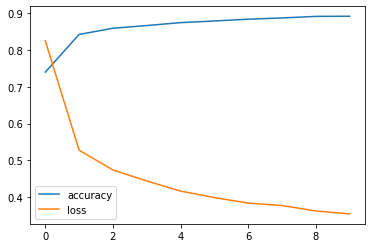

In [141]:
# Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
import pandas as pd

df = pd.DataFrame(history_CNN.history)
df.plot(y=['accuracy', 'loss'])

In [142]:
preds_CNN = model_CNN.predict(X_test_gray_channel)
preds_CNN[0]



814/814 [==============================] - 3s 3ms/step


array([2.4308066e-04, 1.5649002e-04, 2.0847179e-02, 1.5396363e-03,
       9.4329995e-01, 2.9676609e-02, 1.2525675e-03, 1.9995938e-03,
       9.5935608e-04, 2.5431222e-05], dtype=float32)

In [143]:
# Compute and display the loss and accuracy of the trained model on the test set.
# You should aim to beat the MLP model performance with fewer parameters!
print(f"CNN performance: {model_CNN.evaluate(X_test_gray_channel, y_test_one_hot)} v.s. MLP performance: {model.evaluate(X_test_gray_channel, y_test_one_hot)}")

814/814 [==============================] - 2s 3ms/step - loss: 1.0725 - accuracy: 0.6703
CNN performance: [0.43973085284233093, 0.872310996055603] v.s. MLP performance: [1.0725152492523193, 0.6703288555145264]


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [144]:
!ls model_checkpoints_best/checkpoint

model_checkpoints_best/checkpoint


In [145]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               131200    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 146,026
Trainable params: 146,026
Non-tr

In [146]:
!ls 

gdrive	model_checkpoints_best	model_checkpoints_full	sample_data


In [147]:
model_MLP_loaded = model.load_weights(checkpoint_best_path)
model_CNN_loaded = model_CNN.load_weights(checkpoint_best_path_CNN)

In [149]:
preds_MLP = model.predict(X_test_gray_channel)

814/814 [==============================] - 4s 5ms/step


In [150]:
preds_MLP[0]

array([0.03002706, 0.0349046 , 0.04129532, 0.3003812 , 0.18257795,
       0.08957404, 0.0225744 , 0.1097439 , 0.13423266, 0.05468886],
      dtype=float32)

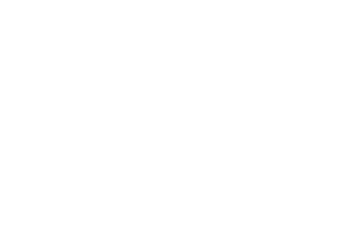

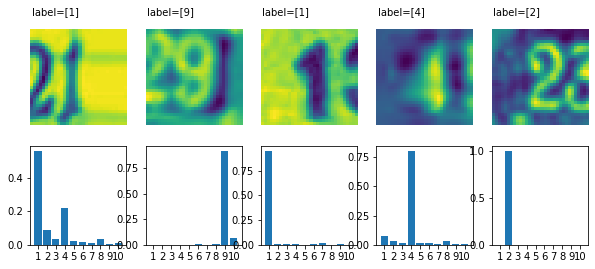

In [151]:
# Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
# Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

import random

plt.axis(False)
fix, ax = plt.subplots(2, 5, figsize=(10, 4))

for i in range(5):
  j = random.randint(0, X_test_gray.shape[0])
  ax[0,i].set_axis_off()
  ax[0,i].text(0, -5, f'label={y_test[j]}')
  ax[0,i].imshow(X_test_gray[j,:,:])
  ax[1,i].bar(np.arange(1,11), preds_MLP[j])
  ax[1,i].set_xticks(np.arange(1,11))


In [153]:
preds_CNN = model_CNN.predict(X_test_gray_channel)

814/814 [==============================] - 3s 3ms/step


In [154]:
preds_CNN[12]

array([7.0113048e-04, 1.6315506e-03, 2.4299392e-02, 3.5501369e-03,
       9.2058349e-01, 3.3742320e-02, 5.2770944e-03, 3.5098307e-03,
       6.3743144e-03, 3.3074428e-04], dtype=float32)

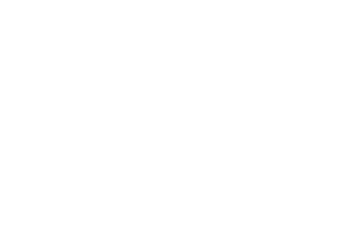

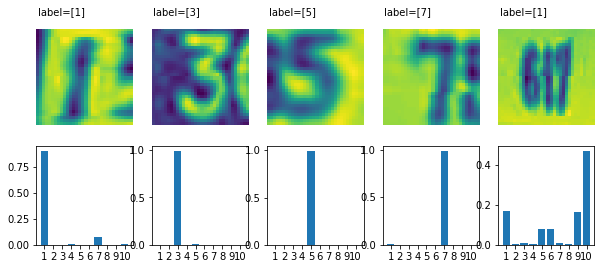

In [155]:
# Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
# Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

import random

plt.axis(False)
fix, ax = plt.subplots(2, 5, figsize=(10, 4))

for i in range(5):
  j = random.randint(0, X_test_gray.shape[0])
  ax[0,i].set_axis_off()
  ax[0,i].text(0, -5, f'label={y_test[j]}')
  ax[0,i].imshow(X_test_gray[j,:,:])
  ax[1,i].bar(np.arange(1,11), preds_CNN[j])
  ax[1,i].set_xticks(np.arange(1,11))